Exercice 1 :

Partie 1 : Chargement et exploration du dataset

In [92]:
import pandas as pd

df = pd.read_csv('employees2.csv')

print(df)



    Unnamed: 0   ID     Name   Age   Salary Department  Years_Experience  \
0            0    1  Othmane   NaN      NaN         IT                 0   
1            1    2    Ikram  22.0      NaN         HR                23   
2            2    3      Bob   NaN      NaN         HR                26   
3            3    4    Zineb  59.0  73665.0         HR                 3   
4            4    5    David  57.0  59325.0    Finance                33   
..         ...  ...      ...   ...      ...        ...               ...   
95          95   96      Bob   NaN  82670.0  Marketing                21   
96          96   97      Eva   NaN  59838.0    Finance                12   
97          97   98   Nassim   NaN  45811.0    Finance                14   
98          98   99   Nassim  42.0  73800.0  Marketing                13   
99          99  100  Othmane  32.0      NaN  Marketing                19   

   Remote  
0     Yes  
1     Yes  
2     Yes  
3      No  
4      No  
..    ...  
95 

Afficher les premières lignes du DataFrame.


In [93]:
print(df.head())

   Unnamed: 0  ID     Name   Age   Salary Department  Years_Experience Remote
0           0   1  Othmane   NaN      NaN         IT                 0    Yes
1           1   2    Ikram  22.0      NaN         HR                23    Yes
2           2   3      Bob   NaN      NaN         HR                26    Yes
3           3   4    Zineb  59.0  73665.0         HR                 3     No
4           4   5    David  57.0  59325.0    Finance                33     No


3.Vérifier les types de données de chaque colonne.


In [94]:
print(df.dtypes)

Unnamed: 0            int64
ID                    int64
Name                 object
Age                 float64
Salary              float64
Department           object
Years_Experience      int64
Remote               object
dtype: object


4.Identifier les valeurs manquantes par colonne.



In [95]:
print(df.isnull())

    Unnamed: 0     ID   Name    Age  Salary  Department  Years_Experience  \
0        False  False  False   True    True       False             False   
1        False  False  False  False    True       False             False   
2        False  False  False   True    True       False             False   
3        False  False  False  False   False       False             False   
4        False  False  False  False   False       False             False   
..         ...    ...    ...    ...     ...         ...               ...   
95       False  False  False   True   False       False             False   
96       False  False  False   True   False       False             False   
97       False  False  False   True   False       False             False   
98       False  False  False  False   False       False             False   
99       False  False  False  False    True       False             False   

    Remote  
0    False  
1    False  
2    False  
3    False  
4    False

Partie 2 : Nettoyage des données

5. Remplacer les valeurs manquantes dans la colonne Age par la médiane de cette colonne.

In [96]:
print(df.fillna(df["Age"].median()))

    Unnamed: 0   ID     Name   Age   Salary Department  Years_Experience  \
0            0    1  Othmane  45.0     45.0         IT                 0   
1            1    2    Ikram  22.0     45.0         HR                23   
2            2    3      Bob  45.0     45.0         HR                26   
3            3    4    Zineb  59.0  73665.0         HR                 3   
4            4    5    David  57.0  59325.0    Finance                33   
..         ...  ...      ...   ...      ...        ...               ...   
95          95   96      Bob  45.0  82670.0  Marketing                21   
96          96   97      Eva  45.0  59838.0    Finance                12   
97          97   98   Nassim  45.0  45811.0    Finance                14   
98          98   99   Nassim  42.0  73800.0  Marketing                13   
99          99  100  Othmane  32.0     45.0  Marketing                19   

   Remote  
0     Yes  
1     Yes  
2     Yes  
3      No  
4      No  
..    ...  
95 

6.Remplir les valeurs manquantes dans Salaire en utilisant la moyenne par département .

In [97]:
df['Salary'] = df['Salary'].fillna(df.groupby('Department')['Salary'].transform('mean'))

print(df)

    Unnamed: 0   ID     Name   Age        Salary Department  Years_Experience  \
0            0    1  Othmane   NaN  69930.000000         IT                 0   
1            1    2    Ikram  22.0  61659.733333         HR                23   
2            2    3      Bob   NaN  61659.733333         HR                26   
3            3    4    Zineb  59.0  73665.000000         HR                 3   
4            4    5    David  57.0  59325.000000    Finance                33   
..         ...  ...      ...   ...           ...        ...               ...   
95          95   96      Bob   NaN  82670.000000  Marketing                21   
96          96   97      Eva   NaN  59838.000000    Finance                12   
97          97   98   Nassim   NaN  45811.000000    Finance                14   
98          98   99   Nassim  42.0  73800.000000  Marketing                13   
99          99  100  Othmane  32.0  70395.153846  Marketing                19   

   Remote  
0     Yes  
1  

7.Convertir toutes les colonnes numériques en type approprié (float ou int).


In [98]:
df['Age'] = df['Age'].fillna(0).astype(int)
df['Salary'] = df['Salary'].astype(float)
df['Years_Experience'] = df['Years_Experience'].astype(int)

print(df)

    Unnamed: 0   ID     Name  Age        Salary Department  Years_Experience  \
0            0    1  Othmane    0  69930.000000         IT                 0   
1            1    2    Ikram   22  61659.733333         HR                23   
2            2    3      Bob    0  61659.733333         HR                26   
3            3    4    Zineb   59  73665.000000         HR                 3   
4            4    5    David   57  59325.000000    Finance                33   
..         ...  ...      ...  ...           ...        ...               ...   
95          95   96      Bob    0  82670.000000  Marketing                21   
96          96   97      Eva    0  59838.000000    Finance                12   
97          97   98   Nassim    0  45811.000000    Finance                14   
98          98   99   Nassim   42  73800.000000  Marketing                13   
99          99  100  Othmane   32  70395.153846  Marketing                19   

   Remote  
0     Yes  
1     Yes  
2  

8.Remplacer les valeurs 'Yes'/'No' dans Remote par 'Oui'/'Non'.


In [99]:
df['Remote'] = df['Remote'].replace({'Yes': 'Oui', 'No': 'Non'})
print(df)

    Unnamed: 0   ID     Name  Age        Salary Department  Years_Experience  \
0            0    1  Othmane    0  69930.000000         IT                 0   
1            1    2    Ikram   22  61659.733333         HR                23   
2            2    3      Bob    0  61659.733333         HR                26   
3            3    4    Zineb   59  73665.000000         HR                 3   
4            4    5    David   57  59325.000000    Finance                33   
..         ...  ...      ...  ...           ...        ...               ...   
95          95   96      Bob    0  82670.000000  Marketing                21   
96          96   97      Eva    0  59838.000000    Finance                12   
97          97   98   Nassim    0  45811.000000    Finance                14   
98          98   99   Nassim   42  73800.000000  Marketing                13   
99          99  100  Othmane   32  70395.153846  Marketing                19   

   Remote  
0     Oui  
1     Oui  
2  

9-Créer une nouvelle colonne Ancienneté_Catégorie qui classe les années d’expérience en :
    Junior : < 3 ans
    Intermédiaire : 3–7 ans
    Senior : 8–15 ans
    Expert : > 15 ans

In [100]:
def experience(years):
    if years < 3:
        return 'Junior'
    elif 3 <= years <= 7:
        return 'Intermédiaire'
    elif 8 <= years <= 15:
        return 'Senior'
    else:
        return 'Expert'

df['Ancienneté_Catégorie'] = df['Years_Experience'].apply(experience)


Partie 3 : Analyses exploratoires et statistiques

10. Calculer le salaire moyen global.


In [101]:
print(df["Salary"].mean())

64504.14296153846


11.Trouver l’employé(e) avec le salaire le plus élevé.

In [102]:
bestSalaryInfo = df.loc[df['Salary'].idxmax()]
print(bestSalaryInfo)

Unnamed: 0                     27
ID                             28
Name                        Jalil
Age                             0
Salary                    84685.0
Department              Marketing
Years_Experience               28
Remote                        Oui
Ancienneté_Catégorie       Expert
Name: 27, dtype: object


12.Calculer le salaire moyen par département.

In [103]:
salMynDep = df.groupby('Department')['Salary'].mean()
print(salMynDep)


Department
Finance      57836.583333
HR           61659.733333
IT           69930.000000
Logistics    64544.750000
Marketing    70395.153846
Name: Salary, dtype: float64


13.Calculer la moyenne et la médiane des salaires par groupe d’ancienneté.

In [104]:


df['Ancienneté_Catégorie'] = df['Years_Experience'].apply(experience)

anciennete = df.groupby('Ancienneté_Catégorie')['Salary'].agg(['mean', 'median'])
print(anciennete)

                              mean        median
Ancienneté_Catégorie                            
Expert                63948.983223  62747.866667
Intermédiaire         66929.632347  64544.750000
Junior                61558.030769  69930.000000
Senior                65145.745620  65650.375000


14.Compter combien d’employés travaillent en télétravail (Remote) par département.



In [105]:
remote = df[df['Remote'] == 'Oui'].groupby('Department').size()
print(remote)


Department
Finance       7
HR           13
IT            9
Logistics     8
Marketing    18
dtype: int64


Partie 4 : Tableaux croisés dynamiques (pivot tables)

15. Créer un tableau croisé dynamique montrant le salaire moyen par département et par télétravail .

In [106]:
remote_salaire = pd.pivot_table(df, values='Salary', index='Department', columns='Remote', aggfunc='mean')
print(remote_salaire)


Remote               Non           Oui
Department                            
Finance     60964.762821  52027.107143
HR          62817.608889  60323.723077
IT          65695.000000  71341.666667
Logistics   65080.750000  64075.750000
Marketing   69812.538462  70621.726496


16. Créer un autre tableau croisé dynamique montrant le nombre moyen d’années d’expérience par groupe d’âge et par département .

In [107]:
experience_age = pd.pivot_table(df, values='Years_Experience', index='Ancienneté_Catégorie', columns='Department', aggfunc='mean')
print(experience_age)


Department              Finance         HR         IT  Logistics  Marketing
Ancienneté_Catégorie                                                       
Expert                28.900000  25.933333  22.857143  23.777778  25.176471
Intermédiaire          5.250000   5.000000        NaN   4.500000   5.500000
Junior                      NaN   1.000000   0.000000   2.000000   1.000000
Senior                12.166667  13.333333  11.750000  10.666667  13.000000


Partie 5 : Calculs avancés avec NumPy

17. Utiliser np.where() pour créer une colonne Performance :
    "Bon" si Salaire < 60000
    "Moyen" si 60000 ≤ Salaire < 80000
    "Haut" si Salaire ≥ 80000 

In [108]:
import numpy as np

df['Performance'] = np.where(df['Salary'] < 60000, 'Bon', np.where(df['Salary'] < 80000, 'Moyen', 'Haut'))

print(df)

    Unnamed: 0   ID     Name  Age        Salary Department  Years_Experience  \
0            0    1  Othmane    0  69930.000000         IT                 0   
1            1    2    Ikram   22  61659.733333         HR                23   
2            2    3      Bob    0  61659.733333         HR                26   
3            3    4    Zineb   59  73665.000000         HR                 3   
4            4    5    David   57  59325.000000    Finance                33   
..         ...  ...      ...  ...           ...        ...               ...   
95          95   96      Bob    0  82670.000000  Marketing                21   
96          96   97      Eva    0  59838.000000    Finance                12   
97          97   98   Nassim    0  45811.000000    Finance                14   
98          98   99   Nassim   42  73800.000000  Marketing                13   
99          99  100  Othmane   32  70395.153846  Marketing                19   

   Remote Ancienneté_Catégorie Performa

18. Utiliser np.select() pour classer les employés selon leur âge et leur ancienneté :
    Jeune & Nouveau
    Jeune & Expérimenté
    Senior & Nouveau
    Senior & Expérimenté

In [113]:
conditions = [
    (df['Age'] < 30) & (df['Years_Experience'] < 3),
    (df['Age'] < 30) & (df['Years_Experience'] >= 3),
    (df['Age'] >= 30) & (df['Years_Experience'] < 3),
    (df['Age'] >= 30) & (df['Years_Experience'] >= 3)
]
choices = ['Jeune & Nouveau', 'Jeune & Expérimenté', 'Senior & Nouveau', 'Senior & Expérimenté']
df['Classification'] = np.select(conditions, choices, default='Autre')

print(df)

    Unnamed: 0   ID     Name  Age        Salary Department  Years_Experience  \
0            0    1  Othmane    0  69930.000000         IT                 0   
1            1    2    Ikram   22  61659.733333         HR                23   
2            2    3      Bob    0  61659.733333         HR                26   
3            3    4    Zineb   59  73665.000000         HR                 3   
4            4    5    David   57  59325.000000    Finance                33   
..         ...  ...      ...  ...           ...        ...               ...   
95          95   96      Bob    0  82670.000000  Marketing                21   
96          96   97      Eva    0  59838.000000    Finance                12   
97          97   98   Nassim    0  45811.000000    Finance                14   
98          98   99   Nassim   42  73800.000000  Marketing                13   
99          99  100  Othmane   32  70395.153846  Marketing                19   

   Remote Ancienneté_Catégorie Performa

19. Calculer la différence entre le salaire de chaque employé et le salaire moyen de son département.

In [109]:
df['différence_Salaire'] = df['Salary'] - df.groupby('Department')['Salary'].transform('mean')
print(df)

    Unnamed: 0   ID     Name  Age        Salary Department  Years_Experience  \
0            0    1  Othmane    0  69930.000000         IT                 0   
1            1    2    Ikram   22  61659.733333         HR                23   
2            2    3      Bob    0  61659.733333         HR                26   
3            3    4    Zineb   59  73665.000000         HR                 3   
4            4    5    David   57  59325.000000    Finance                33   
..         ...  ...      ...  ...           ...        ...               ...   
95          95   96      Bob    0  82670.000000  Marketing                21   
96          96   97      Eva    0  59838.000000    Finance                12   
97          97   98   Nassim    0  45811.000000    Finance                14   
98          98   99   Nassim   42  73800.000000  Marketing                13   
99          99  100  Othmane   32  70395.153846  Marketing                19   

   Remote Ancienneté_Catégorie Performa

Visualisation 


Afficher la distribution des salaires

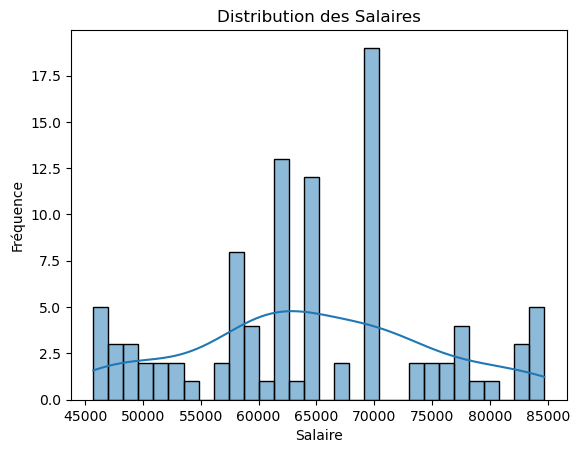

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Salary'], bins=30, kde=True)
plt.title('Distribution des Salaires')
plt.xlabel('Salaire')
plt.ylabel('Fréquence')
plt.show()


In [ ]:
sns.barplot(x=salaire_moyen_par_departement.index, y=salaire_moyen_par_departement.values)
plt.title('Salaires Moyens par Département')
plt.xlabel('Département')
plt.ylabel('Salaire Moyen')
plt.xticks(rotation=45)
plt.show()